In [1]:
# Dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress



In [2]:
#Data Files
mortage_rate = Path('MortageRate_HouseValueData/30_year_fixed_mortgage_by_FreddieMac.csv')
house_values = Path('MortageRate_HouseValueData/County_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

mortage_rate_df = pd.read_csv(mortage_rate)
house_values_df = pd.read_csv(house_values)

house_values_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,212975.508847,...,869954.975653,878067.742426,883097.441686,882055.961553,877150.390199,873255.631790,873908.269833,877153.822292,879295.516241,883035.966550
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,150795.658572,...,300775.020143,301699.133374,302164.120803,302402.124218,303366.204744,305426.677896,308133.807861,310009.520838,311088.578539,311761.624093
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,111153.355482,...,285303.469784,285048.636665,284752.942063,284865.744499,285335.048571,286351.917951,287410.239829,288010.555414,287890.640371,287515.312881
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,144140.356325,...,464980.249259,466776.161724,467741.199729,468106.891173,468648.154040,470108.251801,471891.512217,473300.598955,473470.028161,472862.524459
4,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,216842.661298,...,902532.689606,909016.371808,912435.143858,914728.252057,919311.605890,927614.029973,937977.111708,946849.180044,951394.285382,952856.260799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3069,846,3206,Banner County,county,NE,NE,"Scottsbluff, NE",31,7,NaN,...,336337.857943,338543.207759,339034.199549,337614.352777,336162.232680,337559.230262,340586.441220,344141.068374,344858.888895,347062.491545
3070,1648,3207,Daggett County,county,UT,UT,NaN,49,9,NaN,...,323382.485415,322497.701174,321742.203002,321062.113535,321730.198911,322591.128650,322651.666935,321331.867109,319228.544007,317012.117638
3071,1432,3208,Thomas County,county,NE,NE,NaN,31,171,NaN,...,NaN,147801.832732,147297.792415,147116.188562,146910.410891,147091.485206,147542.273554,147843.452458,148143.563052,147965.839747
3072,2794,3212,McPherson County,county,NE,NE,"North Platte, NE",31,117,NaN,...,282830.014547,284950.480964,286846.977904,288605.018642,290881.132824,295048.148802,300609.757019,305231.134910,307691.410025,310287.867815


# Sorting out the data for NYC and Surrounding Counties

In [3]:
#creating variables of NYC and surrounding states to pull house values all together
NYC_county_list = [581,
1347,
2452,
401,
2511]

# create DataFrame for NYC counties btw 2012-2023
house_values_NYC_df = house_values_df.loc[house_values_df['RegionID'].isin(NYC_county_list)] 
NYC_house_values_2012_2023_df = house_values_NYC_df.iloc[:, 153:297]
NYC_house_values_2012_2023_df

,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
6,445189.737108,445933.262743,445639.694803,446054.190052,447216.903234,448568.070942,4.502843e+05,4.519702e+05,4.547785e+05,4.572154e+05,...,8.279538e+05,8.272292e+05,8.317829e+05,8.383230e+05,8.423982e+05,8.434857e+05,8.425015e+05,8.393059e+05,8.360185e+05,8.346801e+05
10,419148.259420,419392.260250,419838.053571,421306.281042,423605.068090,426740.065490,4.301905e+05,4.325365e+05,4.338657e+05,4.339782e+05,...,7.056096e+05,7.014055e+05,6.976272e+05,6.936555e+05,6.902978e+05,6.870760e+05,6.839087e+05,6.811543e+05,6.792149e+05,6.783995e+05
20,987128.215817,984626.792919,983454.968916,986582.119939,991465.232534,996016.676231,1.001214e+06,1.007911e+06,1.016231e+06,1.022270e+06,...,1.240824e+06,1.225211e+06,1.216249e+06,1.210831e+06,1.205362e+06,1.199131e+06,1.191864e+06,1.182041e+06,1.171045e+06,1.162541e+06
26,336251.576963,335881.228280,337118.318731,340882.733614,345933.516891,349878.565562,3.538905e+05,3.556973e+05,3.569456e+05,3.567881e+05,...,4.459133e+05,4.429931e+05,4.428166e+05,4.435864e+05,4.438754e+05,4.437459e+05,4.431196e+05,4.406467e+05,4.370247e+05,4.339308e+05
143,375644.641387,374694.654232,375241.143295,376901.330585,379018.411908,380899.110166,3.820325e+05,3.824780e+05,3.829729e+05,3.836749e+05,...,6.520771e+05,6.548647e+05,6.585223e+05,6.609948e+05,6.616783e+05,6.614830e+05,6.608207e+05,6.600312e+05,6.589235e+05,6.589815e+05


In [4]:
# creating variables of surrounding states 
surr_county_list =[1252,
3148,
874,
2802,
504,
1106,
771,
2515,
505,]

# create DataFrame for NYC counties btw 2012-2023
house_values_surr_df = house_values_df.loc[house_values_df['RegionID'].isin(surr_county_list)]
surr_house_values_2012_2023_df = house_values_surr_df.iloc[:,153:297]
surr_house_values_2012_2023_df

,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
29,424631.058721,423407.511782,422877.826058,424019.508607,426424.995581,428917.739081,430788.979489,431659.513083,432214.651678,431991.992787,...,701701.267230,704267.752005,708348.243495,713556.002754,718564.732292,723315.646753,727009.394332,730591.734810,734161.136063,738558.920484
48,495252.501007,493492.710226,492709.659437,493242.210508,493302.528030,492451.781278,491331.065811,490378.557652,490340.956180,490048.121720,...,733587.496347,735747.331517,738411.258121,741161.204331,745030.725735,750742.194742,756626.937850,761101.789733,763768.758001,766335.282865
54,404784.660497,404653.671283,407511.139894,411671.802229,414825.851890,415750.937382,416102.370239,416619.016664,417846.102958,418794.513982,...,635590.867381,640189.001750,647038.264276,652723.738345,656352.863342,659224.605391,661069.086138,663050.329948,665196.707717,668056.661566
69,292651.236546,291355.186253,290330.715400,289404.497551,288968.580477,288257.771897,287642.206627,286436.168182,285951.960099,285921.636433,...,479694.947961,483199.065138,488412.387741,493189.083825,496984.446767,500088.085760,502908.423311,505022.050733,507295.616092,509621.988609
71,313653.063546,312875.646435,313160.955604,312517.209014,311939.610773,310698.494845,310196.395919,309885.469661,310653.856548,311414.056108,...,546777.193573,551147.200956,558554.452708,565340.059638,570191.576925,573522.280572,576162.170827,579163.732012,582936.950763,587111.048454
94,297369.082446,296158.440734,296112.151718,296682.560049,297131.104589,296702.527273,296345.099668,295375.039987,295135.922552,294759.273775,...,567061.642186,568882.152242,572580.670645,576604.412167,579919.560270,582152.312424,583427.064047,584421.502624,585525.792310,586131.882601
120,315713.511061,314027.709704,314373.370569,315083.572918,314659.463497,313408.168980,311879.676390,309249.648848,307713.697423,307017.258701,...,528325.251305,532479.195472,539607.431426,547062.471263,551563.532859,554829.592340,557036.692243,559602.462107,562279.399673,564860.290508
210,372250.303075,370042.788427,369031.684859,368482.957563,368061.333769,367607.719171,366793.647926,366663.130462,366835.754997,367367.253802,...,619732.542221,622169.910240,625622.331203,629535.064808,634432.130711,639922.170334,645395.250385,650999.026091,656561.070515,662754.187635
1233,154247.682447,154317.573792,155061.939545,156010.695071,156676.138063,156871.207229,156667.700792,156035.977055,155099.005609,154010.746596,...,255454.659435,257928.421371,261409.671430,267471.669909,274816.673316,282208.964001,288041.341209,292010.076965,293493.638735,292346.152338


# Mean Calculation and Scatter Plot for Surrounding Counties 

In [69]:
#taking the mean of both DataFrames for Surrounding counties
mean_surr_house_values = surr_house_values_2012_2023_df.mean()
mean_surr_house_values_df = pd.DataFrame({'Avg Surrounding Counties': mean_surr_house_values})
mean_surr_house_values_df.index = pd.to_datetime(mean_surr_house_values_df.index)
mean_surr_house_values_df['Year'] = mean_surr_house_values_df.index.year
mean_surr_house_values_df_yearly = mean_surr_house_values_df.groupby('Year').mean()

# Reset index to have 'Year' as a column
mean_surr_house_values_df_yearly = mean_surr_house_values_df_yearly.reset_index()
mortage_rate_df['Year'] = pd.to_datetime(mortage_rate_df['Year'], format='%Y')
mean_surr_house_values_df_yearly['Year'] = pd.to_datetime(mean_surr_house_values_df_yearly['Year'], format='%Y')
merged_df = pd.merge(mortage_rate_df, mean_surr_house_values_df_yearly, on='Year')


The correlation between Surrounding County House Values and 30 Year Fixed Mortage Rates is 0.57


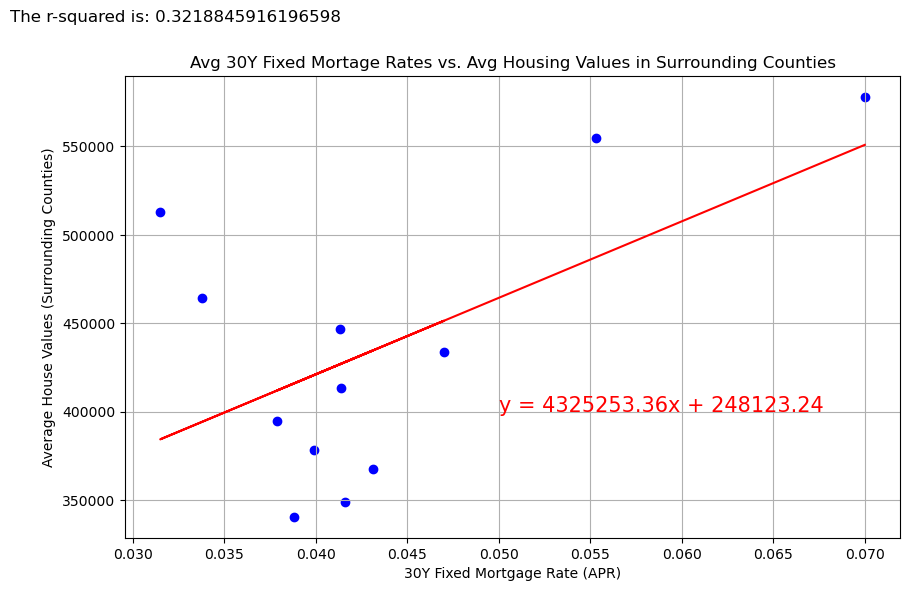

In [43]:
#Scatter Plotting House Price vs Interest Rates for surrounding counties 
fig, axes = plt.subplots()

x_values = merged_df['30-year fixed-rate average']
y_values = merged_df['Avg Surrounding Counties']

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between Surrounding County House Values and 30 Year Fixed Mortage Rates is {round(correlation[0],2)}")
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

r2_text = f"The r-squared is: {rvalue**2}"

# Plotting
# axes.figure(figsize=(10, 6))
axes.scatter(x_values, y_values, color='blue')
axes.plot(x_values, regress_values, "r-")
axes.annotate(line_eq, (0.05,400000), fontsize = 15, color="red")

# Adding titles and labels
axes.set_title('Avg 30Y Fixed Mortage Rates vs. Avg Housing Values in Surrounding Counties')
axes.set_xlabel('30Y Fixed Mortgage Rate (APR)')
axes.set_ylabel('Avg Housing Values (Surrounding Counties)')
fig.text(0.01, 0.97,  r2_text, ha='left', fontsize=12)
fig.set_figheight(6)
fig.set_figwidth(10)


Axes.secondary_xaxis(top, 
axes.grid(True)
plt.show()



# Mean Calculation and Scatter Plot for NYC Counties 

In [70]:
#taking the mean for NYC counties
mean_NYC_house_values = NYC_house_values_2012_2023_df.mean()
mean_NYC_house_values_df = pd.DataFrame({'Avg NYC Counties': mean_NYC_house_values})
mean_NYC_house_values_df.index = pd.to_datetime(mean_NYC_house_values_df.index)
mean_NYC_house_values_df['Year'] = mean_NYC_house_values_df.index.year
mean_NYC_house_values_df_yearly = mean_NYC_house_values_df.groupby('Year').mean()

# Reset index to have 'Year' as a column
mean_NYC_house_values_df_yearly = mean_NYC_house_values_df_yearly.reset_index()
mortage_rate_df['Year'] = pd.to_datetime(mortage_rate_df['Year'], format='%Y')
mean_NYC_house_values_df_yearly['Year'] = pd.to_datetime(mean_NYC_house_values_df_yearly['Year'], format='%Y')
merged_NYC_df = pd.merge(mortage_rate_df, mean_NYC_house_values_df_yearly, on='Year')


The correlation between NYC County House Values and 30 Year Fixed Mortage Rates is 0.24


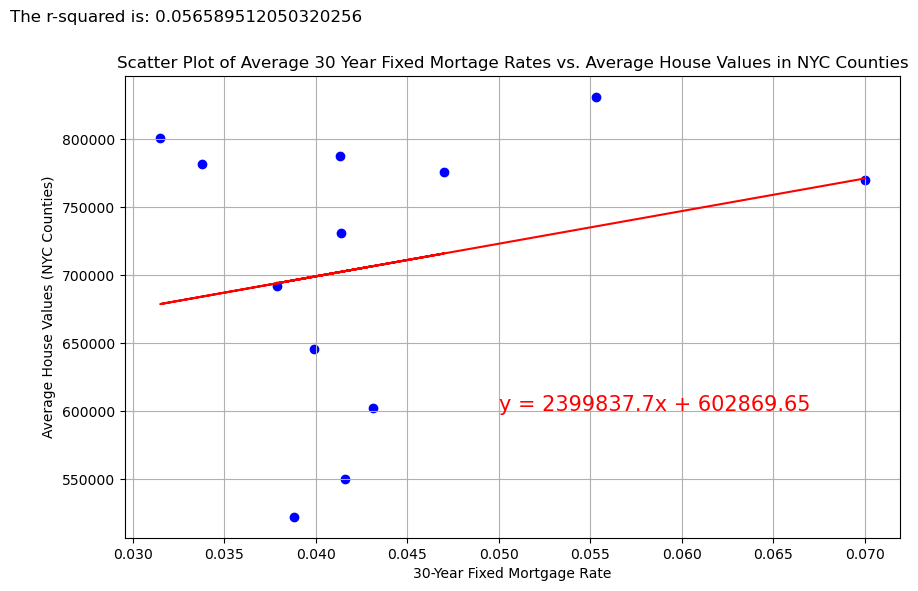

In [42]:
#Scatter Plotting House Values vs Interest Rates for surrounding counties 
fig, axes = plt.subplots()

x_values = merged_NYC_df['30-year fixed-rate average']
y_values = merged_NYC_df['Avg NYC Counties']

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between NYC County House Values and 30 Year Fixed Mortage Rates is {round(correlation[0],2)}")
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

r2_text = f"The r-squared is: {rvalue**2}"

# Plotting
# plt.figure(figsize=(10, 6))
axes.scatter(x_values, y_values, color='blue')
axes.plot(x_values, regress_values, "r-")
axes.annotate(line_eq, (0.05,600000), fontsize = 15, color="red")

# Adding titles and labels
axes.set_title('30Y Fixed Mortage Rates vs. Avg Housing Values in NYC Counties')
axes.set_xlabel('30Y Fixed Mortgage Rate (APR)')
axes.set_ylabel('Avg Housing Values (NYC Counties)')
axes.grid(True)

fig.text(0.01, 0.97,  r2_text, ha='left', fontsize=12)
fig.set_figheight(6)
fig.set_figwidth(10)

plt.show()


# Bar Chart for 30 Year Fixed Mortage Rates Over Time

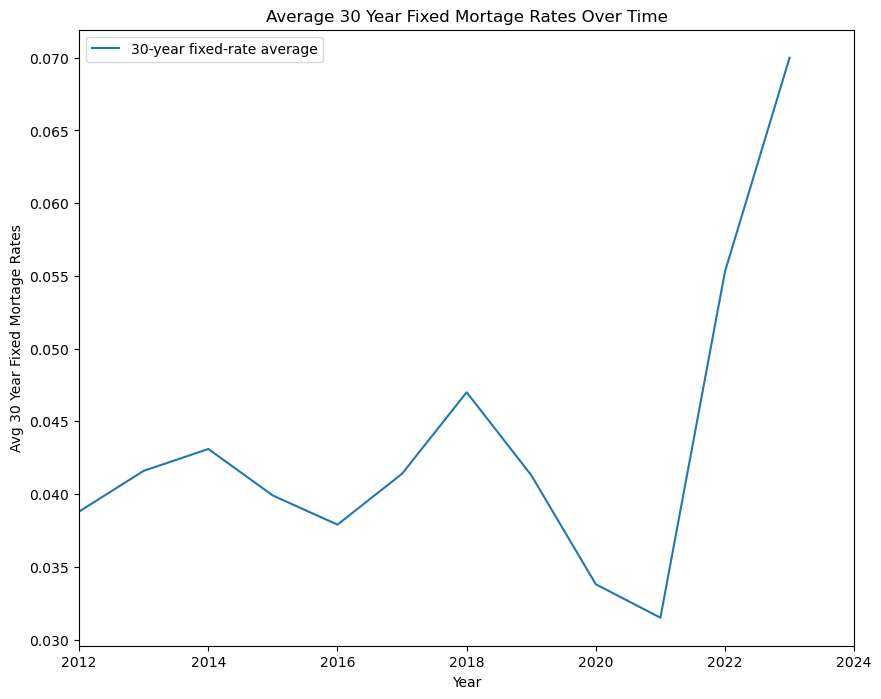

In [68]:
#Creating a bar chart based on mortage rates over time 
mortage_rate_df['Year'] = pd.to_datetime(mortage_rate_df['Year'], format= '%Y')
mortage_rate_df['Year'] = mortage_rate_df['Year'].dt.year

mortage_rate_df['30-year fixed-rate average'] =  pd.to_numeric(mortage_rate_df['30-year fixed-rate average'], errors='coerce')
mortage_rate_chart = mortage_rate_df.plot(x= 'Year', y='30-year fixed-rate average', figsize=(10,8))

mortage_rate_chart.set_xlabel("Year")
mortage_rate_chart.set_ylabel("Avg 30 Year Fixed Mortage Rates")
mortage_rate_chart.set_title("Average 30 Year Fixed Mortage Rates Over Time")

mortage_rate_chart.set_xlim(2012, 2024)

plt.xticks(rotation=360)
plt.show()

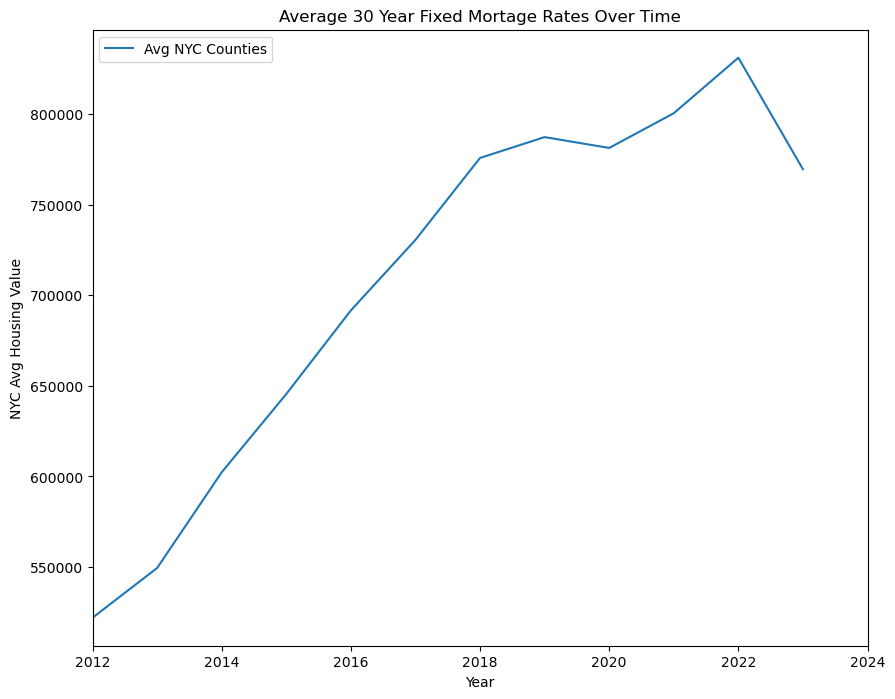

In [63]:
#Creating a bar chart based on mortage rates over time 
merged_NYC_df['Year']= pd.to_datetime(merged_NYC_df['Year'], format='%Y')
merged_NYC_df['Year']= merged_NYC_df['Year'].dt.year

merged_NYC_df['Avg NYC Counties'] =  pd.to_numeric(merged_NYC_df['Avg NYC Counties'], errors='coerce')
nyc_value_chart = merged_NYC_df.plot(x='Year', y='Avg NYC Counties', figsize=(10,8))

nyc_value_chart.set_xlabel("Year")
nyc_value_chart.set_ylabel("NYC Avg Housing Value")
nyc_value_chart.set_title("NYC Avg Housing Value Over Time")

nyc_value_chart.set_xlim(2012, 2024)

plt.xticks(rotation=360)
plt.show()

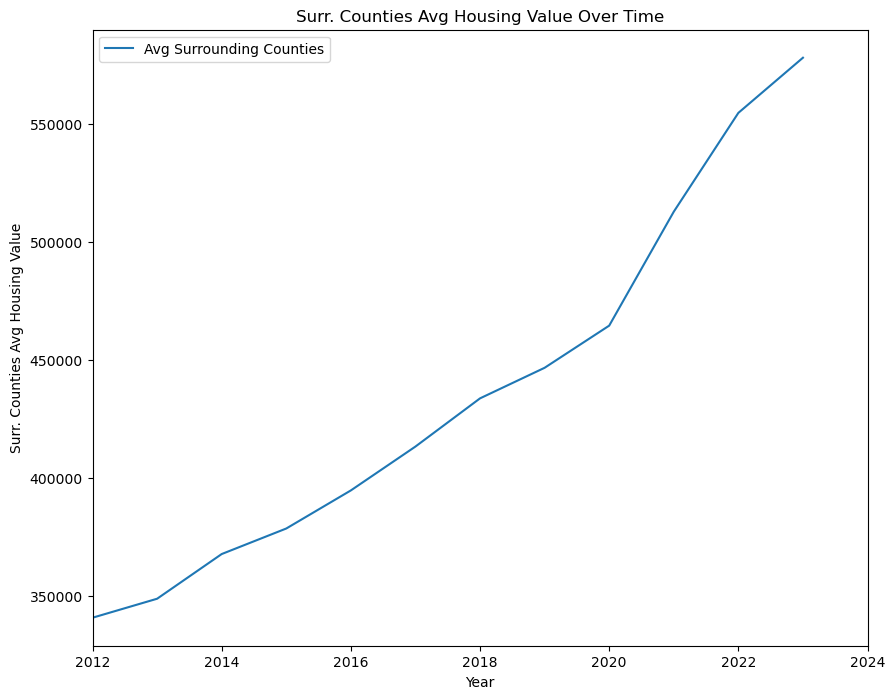

In [66]:
#Creating a bar chart based on mortage rates over time 
merged_df['Year']= pd.to_datetime(merged_df['Year'], format='%Y')
merged_df['Year']= merged_df['Year'].dt.year

merged_df['Avg Surrounding Counties'] =  pd.to_numeric(merged_df['Avg Surrounding Counties'], errors='coerce')
surr_value_chart = merged_df.plot(x='Year', y='Avg Surrounding Counties', figsize=(10,8))

surr_value_chart.set_xlabel("Year")
surr_value_chart.set_ylabel("Surr. Counties Avg Housing Value")
surr_value_chart.set_title("Surr. Counties Avg Housing Value Over Time")

surr_value_chart.set_xlim(2012, 2024)

plt.xticks(rotation=360)
plt.show()